## Introduction

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/winequality-white.csv",delimiter=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## EDA

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df['chlorides'].describe()

count    4898.000000
mean        0.045772
std         0.021848
min         0.009000
25%         0.036000
50%         0.043000
75%         0.050000
max         0.346000
Name: chlorides, dtype: float64

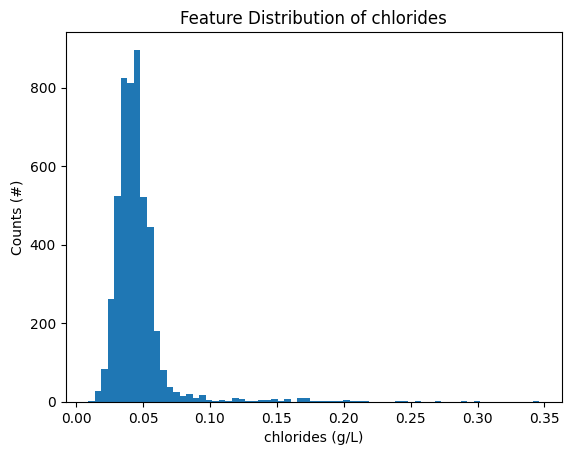

In [6]:
variable = 'chlorides'
plt.hist(df[variable],bins=int(np.sqrt(len(df[variable]))))
plt.ylabel("Counts (#)")
plt.xlabel("chlorides (g/L)")
plt.title("Feature Distribution of chlorides")
plt.savefig('../figures/chlorides.png',dpi=300)
plt.show()

In [7]:
df['residual sugar'].describe()

count    4898.000000
mean        6.391415
std         5.072058
min         0.600000
25%         1.700000
50%         5.200000
75%         9.900000
max        65.800000
Name: residual sugar, dtype: float64

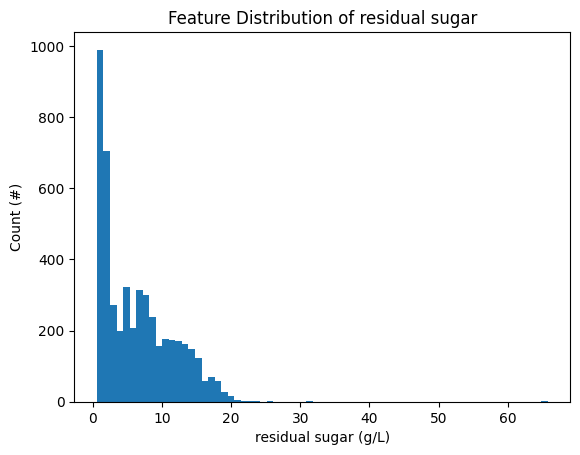

In [146]:
variable = 'residual sugar'
plt.hist(df[variable],bins=int(np.sqrt(len(df[variable]))))
plt.ylabel("Count (#)")
plt.xlabel("residual sugar (g/L)")
plt.title("Feature Distribution of residual sugar")
plt.savefig('../figures/residual sugar.png',dpi=300)
plt.show()

In [142]:
df['density'].describe()

count    4898.000000
mean        0.994027
std         0.002991
min         0.987110
25%         0.991723
50%         0.993740
75%         0.996100
max         1.038980
Name: density, dtype: float64

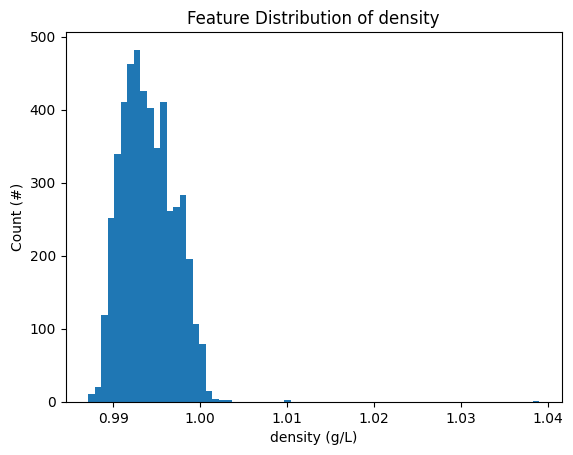

In [145]:
variable = 'density'
plt.hist(df[variable],bins=int(np.sqrt(len(df[variable]))))
plt.ylabel("Count (#)")
plt.xlabel("density (g/L)")
plt.title("Feature Distribution of density")
plt.savefig('../figures/density.png',dpi=300)
plt.show()

In [175]:
#distribution
df['quality'].describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

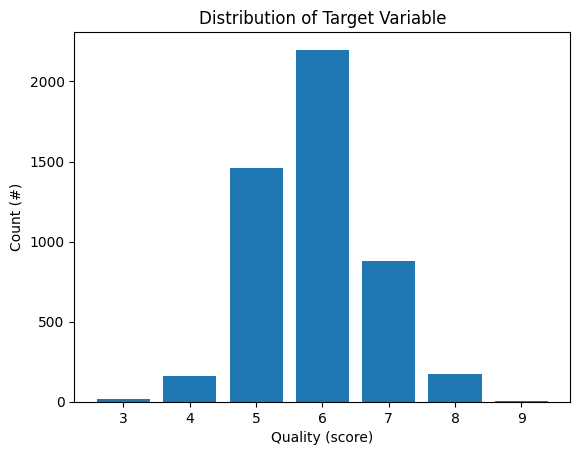

In [176]:
plt.bar(np.sort(df['quality'].unique()),height=df['quality'].value_counts().sort_index().values)
plt.ylabel("Count (#)")
plt.xlabel("Quality (score)")
plt.title("Distribution of Target Variable")
plt.savefig('../figures/Target Variable.png',dpi=300)
plt.show()

In [177]:
#class balance
yy = (df['quality'].value_counts().sort_index().values/len(df)).round(4)
xx = np.sort(df['quality'].unique())
dict(zip(xx,yy))

{3: 0.0041, 4: 0.0333, 5: 0.2975, 6: 0.4488, 7: 0.1797, 8: 0.0357, 9: 0.001}

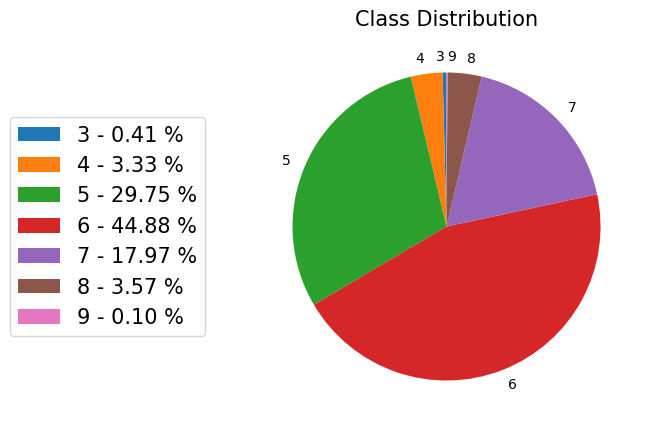

In [178]:
plt.figure(figsize=(10,5))
percent = 100.*yy/yy.sum()
patches, texts = plt.pie(yy,
        labels=xx,
        startangle=90,
        labeldistance=1.1,)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(xx, percent)]
plt.legend(patches, 
           labels,
           loc='center right', 
           bbox_to_anchor=(-0.1, 0.5),
           fontsize=15)
plt.title("Class Distribution", fontsize=15)
plt.savefig('../figures/class distribution.png',dpi=300)
plt.show()

In [8]:
#getting the most correlated input feature with target variable
import sklearn.feature_selection

In [132]:
X = df[['fixed acidity', 
        'volatile acidity', 
        'citric acid', 
        'residual sugar',
        'chlorides', 
        'free sulfur dioxide', 
        'total sulfur dioxide', 
        'density',
        'pH', 
        'sulphates', 
        'alcohol']]
y=df['quality']

In [138]:
np.round(X.corr(),3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000,-0.023,0.289,0.089,0.023,-0.049,0.091,0.265,-0.426,-0.017,-0.121
volatile acidity,-0.023,1.000,-0.149,0.064,0.071,-0.097,0.089,0.027,-0.032,-0.036,0.068
citric acid,0.289,-0.149,1.000,0.094,0.114,0.094,0.121,0.150,-0.164,0.062,-0.076
residual sugar,0.089,0.064,0.094,1.000,0.089,0.299,0.401,0.839,-0.194,-0.027,-0.451
chlorides,0.023,0.071,0.114,0.089,1.000,0.101,0.199,0.257,-0.090,0.017,-0.360
free sulfur dioxide,-0.049,-0.097,0.094,0.299,0.101,1.000,0.616,0.294,-0.001,0.059,-0.250
total sulfur dioxide,0.091,0.089,0.121,0.401,0.199,0.616,1.000,0.530,0.002,0.135,-0.449
density,0.265,0.027,0.150,0.839,0.257,0.294,0.530,1.000,-0.094,0.074,-0.780
pH,-0.426,-0.032,-0.164,-0.194,-0.090,-0.001,0.002,-0.094,1.000,0.156,0.121
sulphates,-0.017,-0.036,0.062,-0.027,0.017,0.059,0.135,0.074,0.156,1.000,-0.017


In [113]:
import seaborn as sns

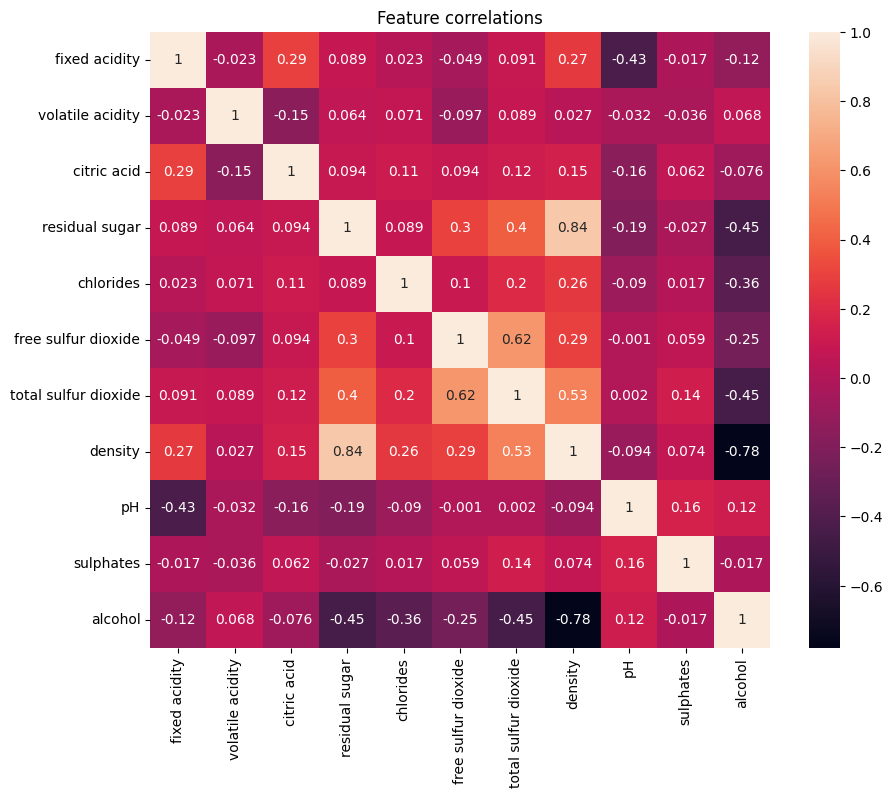

In [150]:
plt.figure(figsize=(10,8))
sns.heatmap(np.round(X.corr(),3), annot=True)
plt.title('Feature correlations')
plt.savefig('../figures/heat.png',dpi=300,bbox_inches='tight')
plt.show()

In [128]:
a = sklearn.feature_selection.f_regression(X, y.values.reshape(-1,), center=True, force_finite=True)
X.columns[np.argsort(a[0])[-5:]].values.tolist() 
#the last one has the largest correlation with the target variable

['total sulfur dioxide', 'volatile acidity', 'chlorides', 'density', 'alcohol']

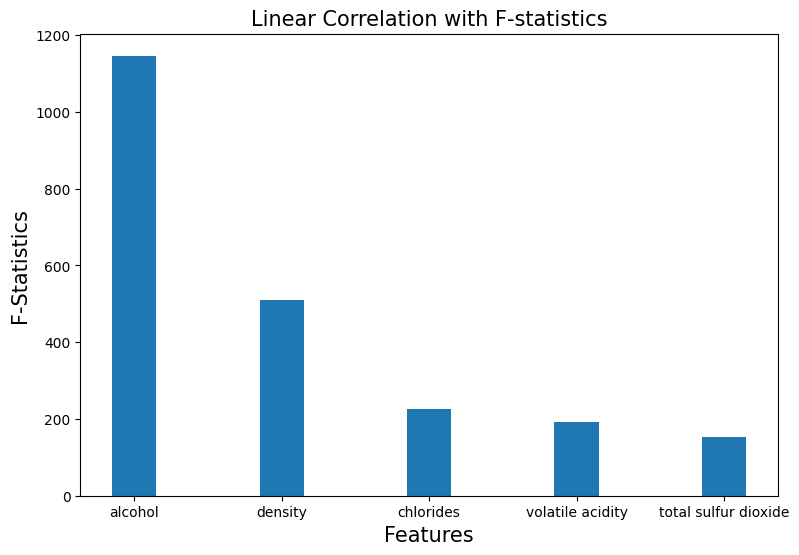

In [130]:
fontsize=15
plt.figure(figsize=(9,6))
columns_to_plot=[]
for i in np.argsort(a[0])[-5:]:
    columns_to_plot+=[X.columns[i]]
plt.bar(np.flip(columns_to_plot),np.flip(np.sort(a[0])[-5:]),width=0.3)
plt.xlabel("Features", fontsize=fontsize)
plt.ylabel('F-Statistics', fontsize=fontsize)
plt.title('Linear Correlation with F-statistics', fontsize=fontsize)
plt.savefig('../figures/f-stats.png',dpi=300)
plt.show()

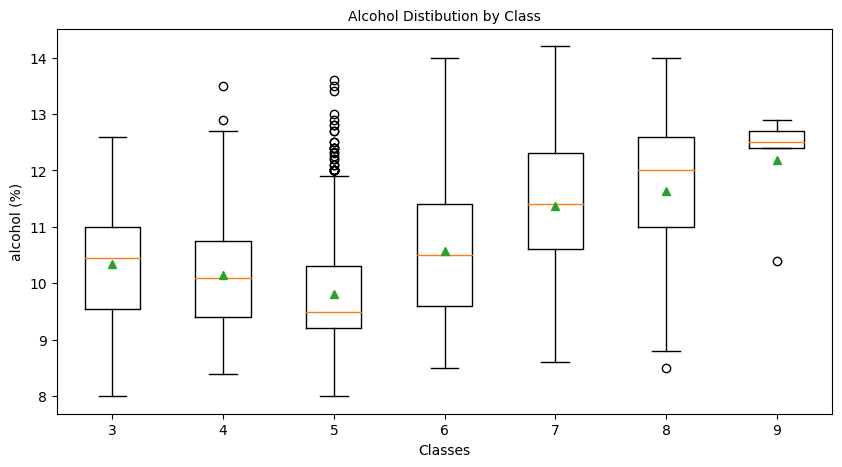

In [184]:
fontsize=10
sorted_classes = np.sort(y.unique())
res = [df[df['quality']==i]['alcohol'].values for i in sorted_classes]
plt.figure(figsize=(10,5))
plt.boxplot(res, labels= sorted_classes, showmeans=True)
plt.xlabel('Classes',fontsize=fontsize) #set labels
plt.ylabel('alcohol (%)',fontsize=fontsize) #set labels
plt.title('Alcohol Distibution by Class',fontsize=fontsize)
plt.savefig('../figures/alcohol.png',dpi=300)
plt.show()

## Preprocessing

In [6]:
import sklearn.model_selection

In [10]:
X_train,X_,y_train,y_=sklearn.model_selection.train_test_split(X,y,train_size = 0.6,stratify=y)
X_val,X_test,y_val,y_test=sklearn.model_selection.train_test_split(X_,y_,train_size = 0.5,stratify=y_)

In [12]:
#showing the class distribution in the split of quality score 9
np.sum(y_train==9),np.sum(y_val==9),np.sum(y_test==9)

(3, 1, 1)

In [ ]:
import sklearn.preprocessing

In [11]:
scaler = sklearn.preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

- **Describe why you chose a particular preprocessor for each feature.**

- fixed acidity: I choose MinMaxScaler because the variable has a large std and mean, MinMaxScaler makes it into from 0 to 1.
- volatile acidity: I choose MinMaxScaler because the variable has a large std and is not zero centered.
- citric acid: I choose MinMaxScaler because the variable has a large std and is not zero centered.
- residual sugar: I choose MinMaxScaler because the variable is not normally distributed and MinMaxScaler is useful for skewed data.
- chlorides: I choose MinMaxScaler because the variable has a large std and is not zero centered.
- free sulfur dioxide: I choose MinMaxScaler because the variable has a large std and mean, MinMaxScaler makes it into from 0 to 1.
- total sulfur dioxide: I choose MinMaxScaler because the variable has a large std and mean, MinMaxScaler makes it into from 0 to 1.
- density: I choose MinMaxScaler because the variable has a large std and is not zero centered.
- pH: I choose MinMaxScaler because the variable has a large std and mean, MinMaxScaler makes it into from 0 to 1.
- sulphates: I choose MinMaxScaler because the variable has a large std and is not zero centered.
- alcohol: I choose MinMaxScaler because the variable is not normally distributed and MinMaxScaler is useful for skewed data.

**Baseline**

In [13]:
from sklearn.metrics import mean_squared_error,accuracy_score

In [14]:
rmse=[]
acc=[]
for i in range(5):
    X_train,X_,y_train,y_=sklearn.model_selection.train_test_split(X,y,train_size = 0.6,stratify=y,random_state=i)
    X_val,X_test,y_val,y_test=sklearn.model_selection.train_test_split(X_,y_,train_size = 0.5,stratify=y_,random_state=i)
    y_pred = np.array([np.mean(y_test) for i in range(len(y_test))])
    rmse.append(mean_squared_error(y_test,y_pred,squared=False))
    i = np.round(y_pred,0)
    acc.append(accuracy_score(y_test,i))

In [15]:
baseline_rmse = np.mean(rmse)
np.mean(rmse),np.std(rmse)

(0.8856880769658149, 0.0006354119413675808)

In [16]:
baseline_acc = np.mean(acc)
np.mean(acc)

0.44897959183673464

**Model Selection**

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
def MLpipe_RMSE(X,y,preprocessor,estimator,param_grid):
    
    test_scores = np.zeros(5)
    final_models = []
    test_sets = []
    test_labels = []
    for i in range(5):
        
        pg = ParameterGrid(param_grid)
        X_other, X_test, y_other, y_test = train_test_split(X,y,test_size=0.2,shuffle=True, random_state=i, stratify=y)
        X_train, X_val, y_train, y_val = train_test_split(X_other,y_other,test_size=0.25,shuffle=True, random_state=1*i, stratify=y_other)
        X_train = preprocessor.fit_transform(X_train)
        X_val = preprocessor.transform(X_val)
        X_test = preprocessor.transform(X_test)
        
        train_score = np.zeros(len(pg))
        val_score = np.zeros(len(pg))
        models = []
        for j in range(len(pg)):
            params=pg[j]
            try:
                regr = estimator(**params,random_state = 1*i)
            except:
                regr = estimator(**params)
            regr.fit(X_train, y_train)
            models.append(regr)
            y_train_pred = regr.predict(X_train)
            train_score[j] = mean_squared_error(y_train,y_train_pred,squared=False)
            y_val_pred = regr.predict(X_val)
            val_score[j] = mean_squared_error(y_val,y_val_pred,squared=False)
        
        final_models.append(models[np.argmin(val_score)])
        y_test_pred = final_models[-1].predict(X_test)
        test_scores[i] = mean_squared_error(y_test,y_test_pred,squared=False)
        test_sets.append(X_test)
        test_labels.append(y_test)
        
    return final_models,test_scores,test_sets,test_labels

In [29]:
from sklearn.linear_model import Ridge
param_grid = {
              'alpha':[0.001,0.01,0.1,1,10]
              } 
preprocessor = sklearn.preprocessing.MinMaxScaler()
estimator = Ridge

ridge_final_models,ridge_test_score,ridge_test_sets, ridge_test_labels = MLpipe_RMSE(X,y,preprocessor,estimator,param_grid)

In [30]:
ridge_final_models

[Ridge(alpha=0.001, random_state=0),
 Ridge(alpha=0.001, random_state=1),
 Ridge(alpha=1, random_state=2),
 Ridge(alpha=0.001, random_state=3),
 Ridge(alpha=0.001, random_state=4)]

In [31]:
ridge_test_score

array([0.73740461, 0.73107326, 0.7435034 , 0.75128168, 0.76408618])

In [32]:
np.mean(ridge_test_score),np.std(ridge_test_score)

(0.7454698261355285, 0.011458811922170747)

In [33]:
-(np.mean(ridge_test_score) - baseline_rmse)/np.std(ridge_test_score)

12.209005607471607

In [34]:
ridge_acc=[]
for i in range(5):
    y_pred = np.round(ridge_final_models[i].predict(ridge_test_sets[i]),0)
    ridge_acc.append(accuracy_score(ridge_test_labels[i],y_pred))

In [35]:
np.mean(ridge_acc),np.std(ridge_acc)

(0.5181632653061224, 0.009602686004913126)

In [42]:
from sklearn import svm
param_grid = {
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree':[2,3]
              } 

preprocessor = sklearn.preprocessing.MinMaxScaler()

estimator = svm.SVR
svm_final_models,svm_test_score,svm_test_sets, svm_test_labels = MLpipe_RMSE(X,y,preprocessor,estimator,param_grid)

In [43]:
svm_final_models

[SVR(degree=2), SVR(degree=2), SVR(degree=2), SVR(degree=2), SVR(degree=2)]

In [44]:
np.mean(svm_test_score)

0.7011781669146365

In [45]:
np.std(svm_test_score)

0.006637052249573554

In [46]:
-(np.mean(svm_test_score) - baseline_rmse)/np.std(svm_test_score)

27.752133222315962

In [62]:
svm_acc=[]
for i in range(5):
    y_pred = np.round(svm_final_models[i].predict(svm_test_sets[i]),0)
    svm_acc.append(accuracy_score(svm_test_labels[i],y_pred))

In [63]:
np.mean(svm_acc),np.std(svm_acc)

(0.5618367346938775, 0.006848147647168375)

In [19]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {
              'n_estimators':[10,100,1000],
              'max_depth': [1, 3, 10, 30, 100],
              'max_features': [0.25, 0.5,0.75,1.0],
                'n_jobs':[6]
              } 

preprocessor = sklearn.preprocessing.MinMaxScaler()
estimator = RandomForestRegressor
rf_final_models,rf_test_score,rf_test_sets, rf_test_labels = MLpipe_RMSE(X,y,preprocessor,estimator,param_grid)

In [53]:
rf_final_models

[RandomForestRegressor(max_depth=100, max_features=0.25, n_estimators=1000,
                       random_state=0),
 RandomForestRegressor(max_depth=30, max_features=0.25, n_estimators=1000,
                       random_state=1),
 RandomForestRegressor(max_depth=100, max_features=0.5, n_estimators=1000,
                       random_state=2),
 RandomForestRegressor(max_depth=100, max_features=0.25, n_estimators=1000,
                       random_state=3),
 RandomForestRegressor(max_depth=30, max_features=0.25, random_state=4)]

In [20]:
rf_test_score

array([0.60868292, 0.60756117, 0.6231741 , 0.62133833, 0.62262338])

In [21]:
np.mean(rf_test_score)

0.6166759809488486

In [56]:
np.std(rf_test_score)

0.007018597120680835

In [57]:
-(np.mean(rf_test_score) - baseline_rmse)/np.std(rf_test_score)

38.28322663053219

In [60]:
rf_acc=[]
for i in range(5):
    y_pred = np.round(rf_final_models[i].predict(rf_test_sets[i]),0)
    rf_acc.append(accuracy_score(rf_test_labels[i],y_pred))

In [61]:
np.mean(rf_acc),np.std(rf_acc)

(0.6595918367346939, 0.012689217597314142)

In [65]:
from sklearn.neighbors import KNeighborsRegressor

param_grid = {
              'n_neighbors': [1, 5, 10, 20],
              'weights': ['uniform', 'distance']
              } 

preprocessor = sklearn.preprocessing.MinMaxScaler()

estimator = KNeighborsRegressor
knn_final_models,knn_test_score,knn_test_sets, knn_test_labels = MLpipe_RMSE(X,y,preprocessor,estimator,param_grid)

In [66]:
knn_final_models

[KNeighborsRegressor(n_neighbors=20, weights='distance'),
 KNeighborsRegressor(n_neighbors=20, weights='distance'),
 KNeighborsRegressor(n_neighbors=10, weights='distance'),
 KNeighborsRegressor(n_neighbors=20, weights='distance'),
 KNeighborsRegressor(n_neighbors=20, weights='distance')]

In [67]:
knn_test_score

array([0.63570245, 0.62816676, 0.64985247, 0.64755979, 0.66330247])

In [68]:
np.mean(knn_test_score)

0.6449167855837239

In [69]:
np.std(knn_test_score)

0.01212309377348632

In [70]:
-(np.mean(knn_test_score) - baseline_rmse)/np.std(knn_test_score)

19.834354502019234

In [73]:
knn_acc=[]
for i in range(5):
    y_pred = np.round(knn_final_models[i].predict(knn_test_sets[i]),0)
    knn_acc.append(accuracy_score(knn_test_labels[i],y_pred))

In [74]:
np.mean(knn_acc),np.std(knn_acc)

(0.6483673469387755, 0.005023891275547397)

In [75]:
import xgboost

param_grid = {
             'max_depth': [1, 3, 10, 100],
              'n_estimators':[10,100,500]
              } 

preprocessor = sklearn.preprocessing.MinMaxScaler()

estimator = xgboost.XGBRegressor
xgb_final_models,xgb_test_score,xgb_test_sets, xgb_test_labels = MLpipe_RMSE(X,y,preprocessor,estimator,param_grid)

D:\Anaconda3\envs\data1030\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [76]:
xgb_final_models

[XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None),
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=100, min_child_weight=1, missing=nan,
      

In [77]:
np.mean(xgb_test_score)

0.6707763880003469

In [78]:
np.std(xgb_test_score)

0.008566341970764718

In [79]:
-(np.mean(xgb_test_score) - baseline_rmse)/np.std(xgb_test_score)

25.050848761384422

In [80]:
xgb_acc=[]
for i in range(5):
    y_pred = np.round(xgb_final_models[i].predict(xgb_test_sets[i]),0)
    xgb_acc.append(accuracy_score(xgb_test_labels[i],y_pred))

In [82]:
np.mean(xgb_acc),np.std(xgb_acc)

(0.6348979591836734, 0.021505207954807343)

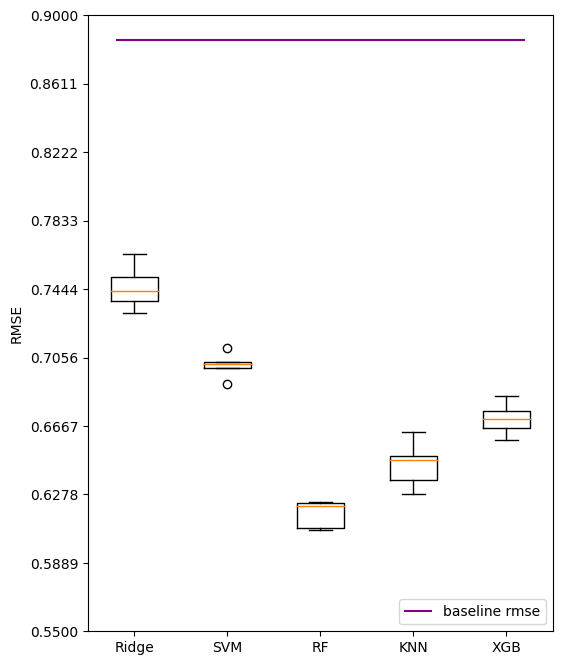

In [123]:
plt.figure(figsize=(6,8))
plt.boxplot([ridge_test_score,svm_test_score,rf_test_score,knn_test_score,xgb_test_score],labels=['Ridge','SVM','RF','KNN','XGB'])
plt.hlines(y=0.886, color='purple', xmin=0.8, xmax=5.2,linestyle='-',label='baseline rmse')
plt.yticks(np.linspace(0.55,0.9,10))
plt.ylabel('RMSE')
plt.legend(loc='lower right')
plt.savefig('../figures/rmse.png',dpi=300)
plt.show()

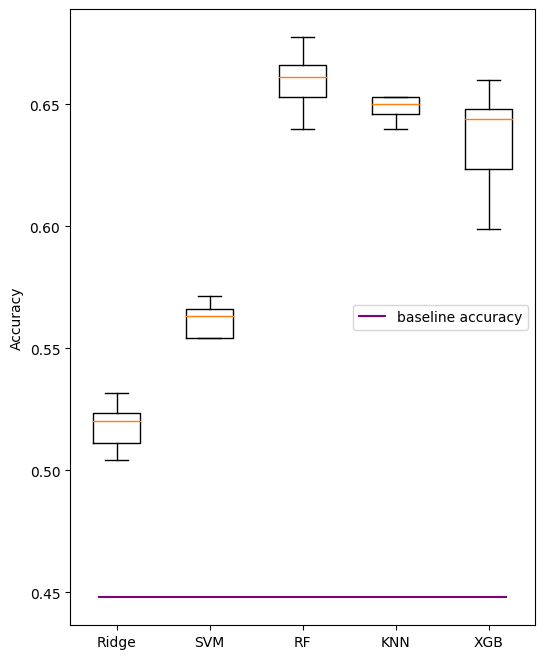

In [124]:
plt.figure(figsize=(6,8))
plt.boxplot([ridge_acc,svm_acc,rf_acc,knn_acc,xgb_acc],labels=['Ridge','SVM','RF','KNN','XGB'])
plt.hlines(y=0.448, color='purple', xmin=0.8, xmax=5.2,linestyle='-',label='baseline accuracy')
plt.ylabel('Accuracy')
plt.legend(loc='center right')
plt.savefig('../figures/acc.png',dpi=300)
plt.show()

**Best Model and feature importance**

In [22]:
model = rf_final_models[1]

In [107]:
y_pred = model.predict(rf_test_sets[1])
mean_squared_error(rf_test_labels[1],y_pred,squared=False)

0.6075611685467369

In [24]:
score_pred = np.round(y_pred,0)
accuracy_score(rf_test_labels[1],score_pred)

0.6663265306122449

In [25]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(rf_test_sets[1])
print(explainer.expected_value)
print(np.shape(shap_values))

D:\Anaconda3\envs\data1030\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[5.87749966]
(980, 11)


In [57]:
feature_names = np.array(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol'])

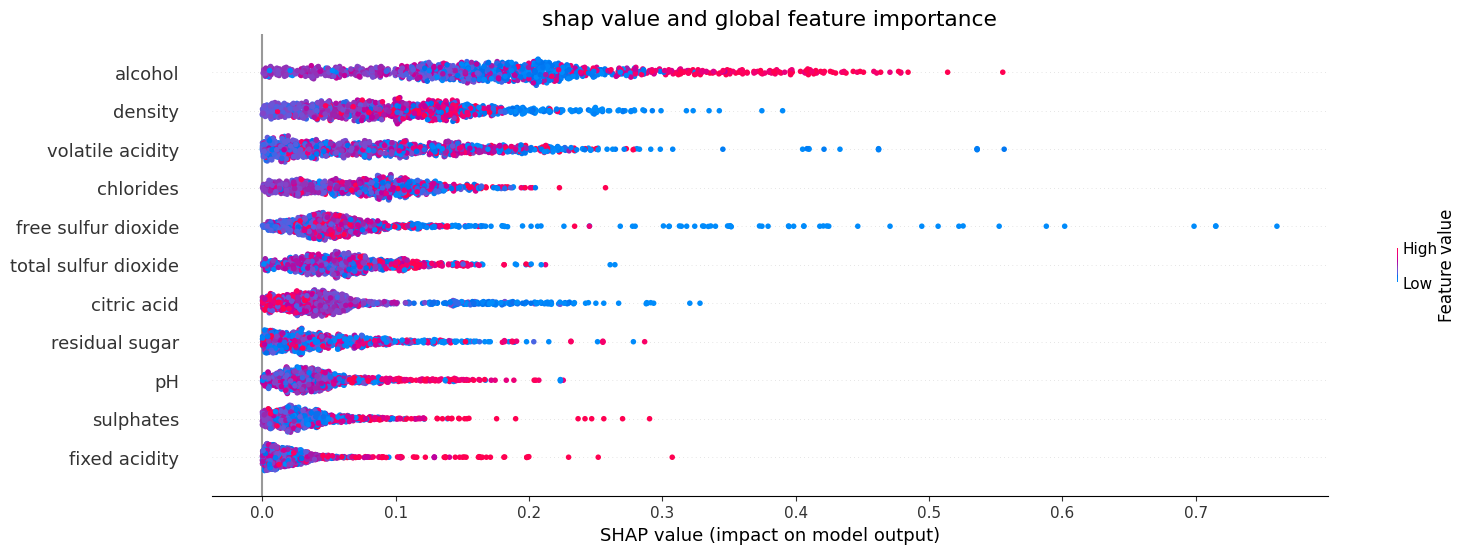

In [179]:
shap.summary_plot(np.abs(shap_values), 
                  rf_test_sets[1],
                  title='efwefw',
                  plot_size=(18,6),
                  feature_names = feature_names, 
                  max_display=15,
                  show=False,
                  color_bar=True)
plt.title('shap value and global feature importance')
plt.savefig('../figures/global.png',dpi=300)
plt.show()

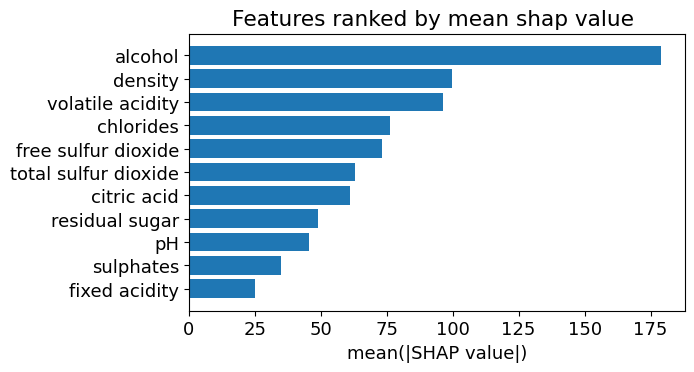

In [180]:
shap_summary = np.sum(np.abs(shap_values),axis=0) # same shape as the number of features
indcs = np.argsort(shap_summary)
shap_summary[indcs]

plt.figure(figsize=(6.4,3.6))
plt.barh(feature_names[indcs[-15:]],shap_summary[indcs[-15:]])
plt.xlabel('mean(|SHAP value|)')
plt.title('Features ranked by mean shap value ')
plt.savefig('../figures/global2.png',dpi=300)
plt.show()

In [152]:
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [160]:
y_pred = model.predict(rf_test_sets[1])
test_score = mean_squared_error(rf_test_labels[1],y_pred,squared=False)
ftr_names = np.array(['fixed acidity', 
        'volatile acidity', 
        'citric acid', 
        'residual sugar',
        'chlorides', 
        'free sulfur dioxide', 
        'total sulfur dioxide', 
        'density',
        'pH', 
        'sulphates', 
        'alcohol'])

In [158]:
result = permutation_importance(model, rf_test_sets[1], rf_test_labels[1], scoring='r2' , n_repeats=10, random_state=0, n_jobs=6)
scores = result.importances

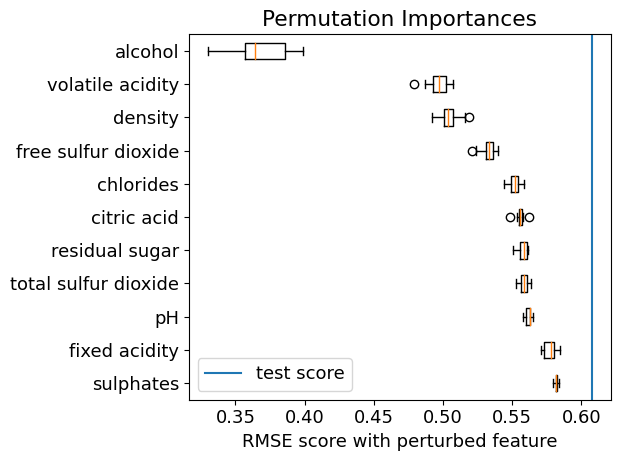

In [176]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 13})
plt.figure(figsize=(6.4,4.8))
plt.boxplot(np.flip((test_score-scores[sorted_indcs])[:15].T),labels=np.flip(ftr_names[sorted_indcs][:15]),vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances")
plt.xlabel('RMSE score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.savefig('../figures/perm.png',dpi=300)
plt.show()

In [171]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
importances_sort = np.sort(importances)

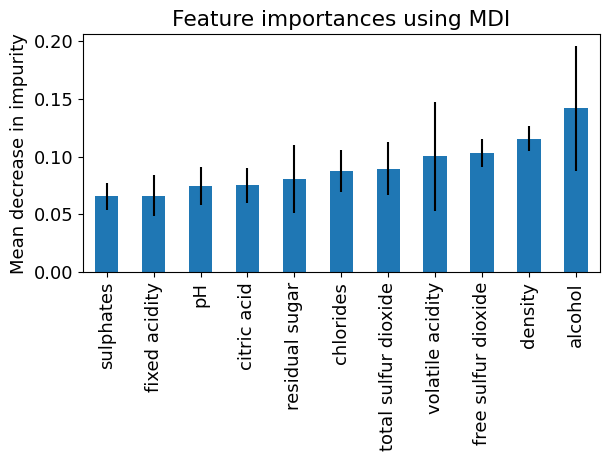

In [173]:
forest_importances = pd.Series(importances_sort, index=ftr_names[np.argsort(importances)])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
fig.savefig('../figures/self.png',dpi=300)

In [181]:
shap_values = np.round(shap_values,4)

In [76]:
test_labels=rf_test_labels
test_sets=rf_test_sets

8


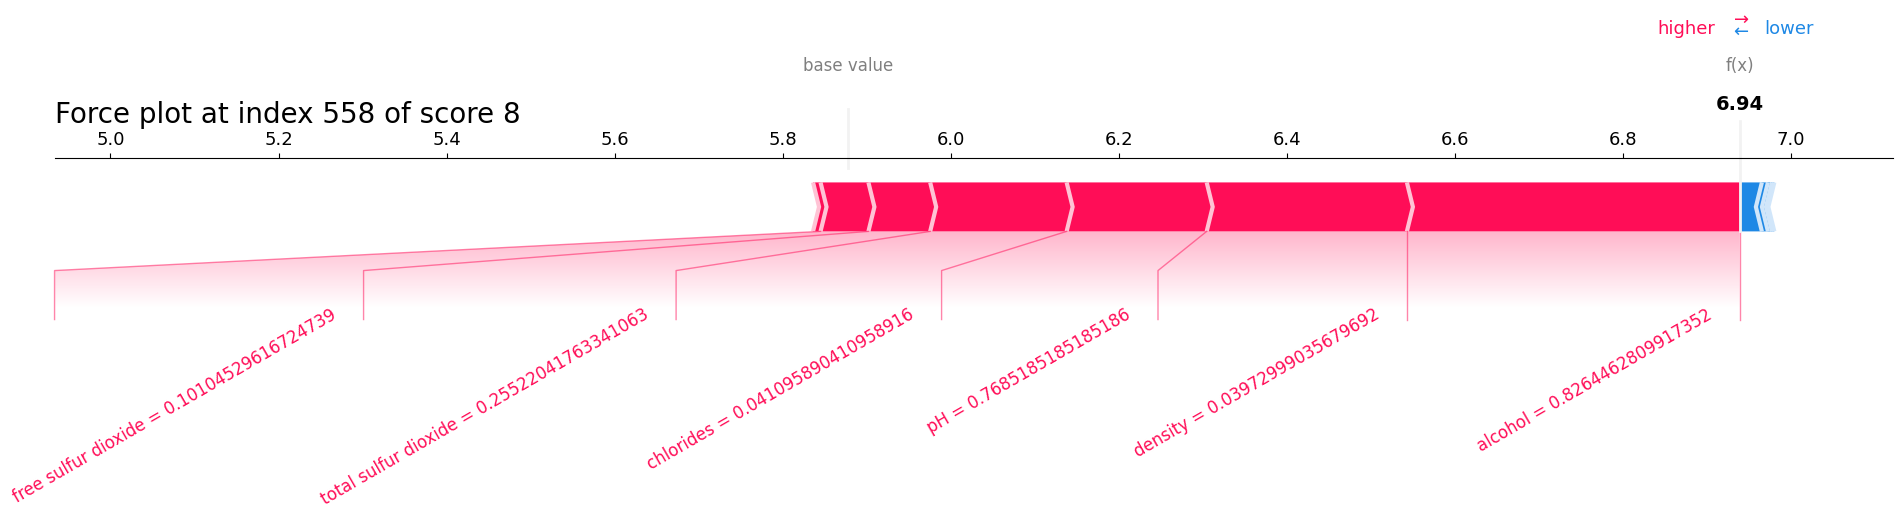

In [198]:
index = 558 # the index of the point to explain
print(test_labels[1].values[558])

shap.force_plot(explainer.expected_value, shap_values[index,:], features = test_sets[1][index,:],feature_names = feature_names,matplotlib=True, figsize=(20, 6),text_rotation=30,show=False)
plt.title('Force plot at index 558 of score 8',loc='left',fontdict={'fontsize': 20})
plt.tight_layout(pad=2)
plt.savefig('../figures/local1.png',dpi=300)
plt.show()

9


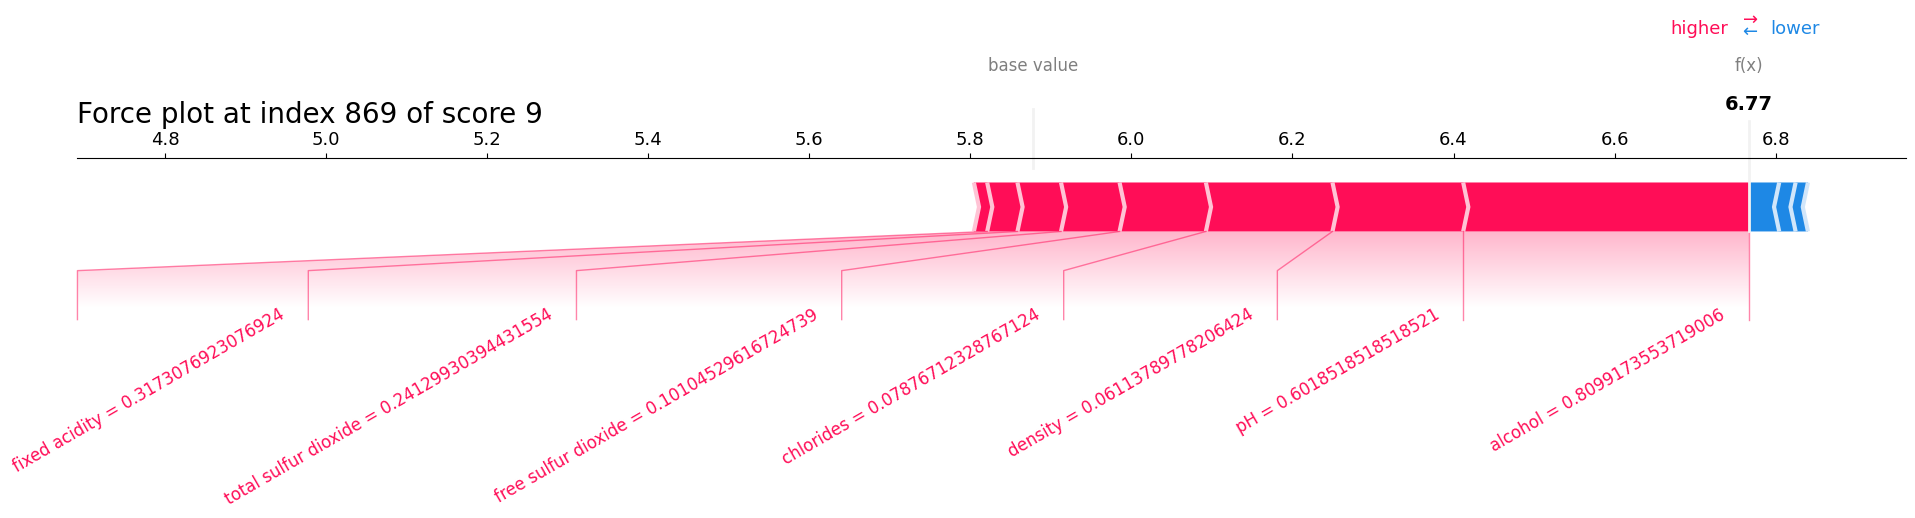

In [199]:
index = 869 # the index of the point to explain
print(test_labels[1].values[index])
shap.force_plot(explainer.expected_value, shap_values[index,:], features = test_sets[1][index,:],feature_names = feature_names,matplotlib=True, figsize=(20, 6),text_rotation=30,show=False)
plt.title('Force plot at index 869 of score 9',loc='left',fontdict={'fontsize': 20})
plt.tight_layout(pad=2)
plt.savefig('../figures/local2.png',dpi=300)
plt.show()

5


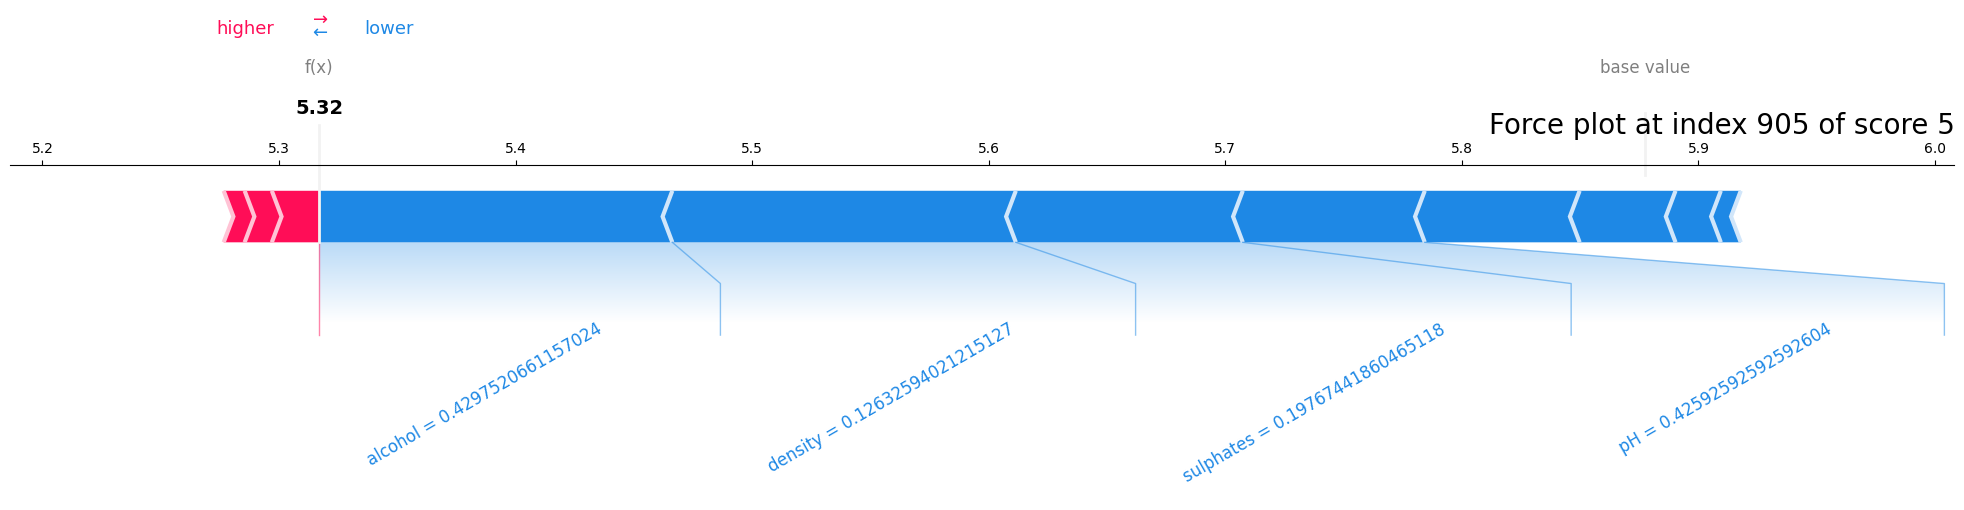

In [94]:
index = 905 # the index of the point to explain
print(rf_test_labels[1].values[index])
shap.force_plot(explainer.expected_value, shap_values[index,:], features = rf_test_sets[1][index,:],feature_names = feature_names,matplotlib=True, figsize=(20, 6),text_rotation=30,show=False)
plt.title('Force plot at index 905 of score 5',loc='right',fontdict={'fontsize': 20})
plt.tight_layout(pad=2)
plt.savefig('../figures/local3.png',dpi=300)
plt.show()

3


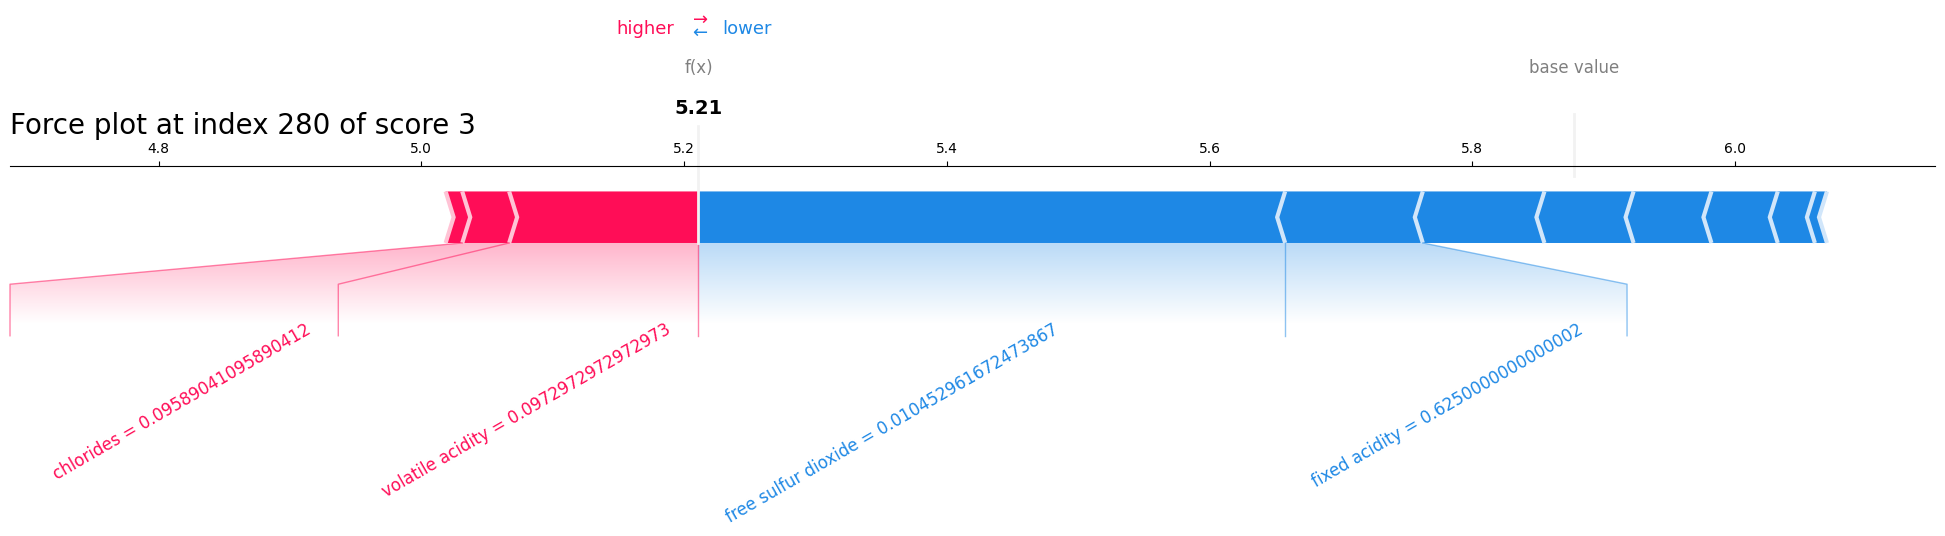

In [313]:
index = 280 # the index of the point to explain
print(test_labels[1].values[index])
shap.force_plot(explainer.expected_value, shap_values[index,:], features = test_sets[1][index,:],feature_names = feature_names,matplotlib=True, figsize=(20, 6),text_rotation=30,show=False)
plt.title('Force plot at index 280 of score 3',loc='left',fontdict={'fontsize': 20})
plt.tight_layout(pad=2)
plt.savefig('../figures/local4.png',dpi=300)
plt.show()

4


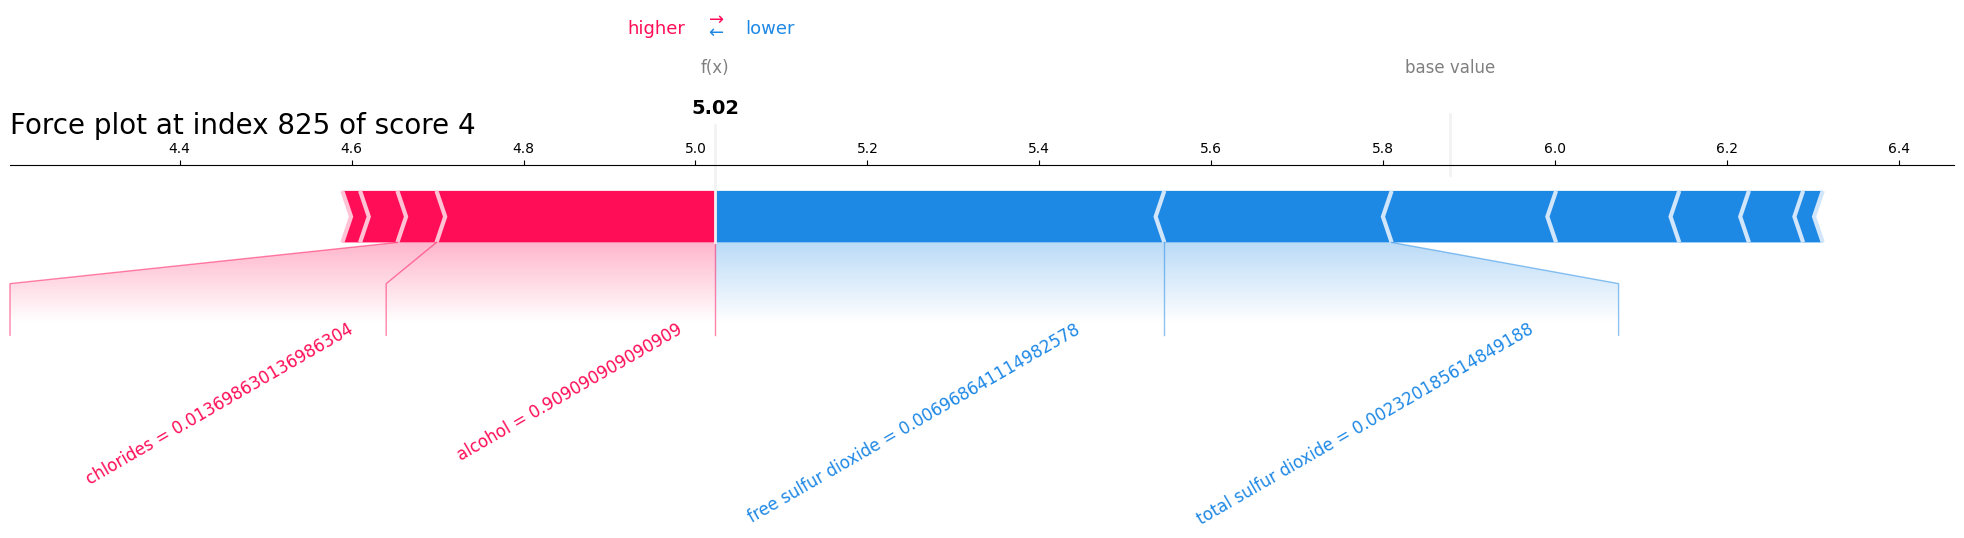

In [104]:
index = 825 # the index of the point to explain
print(test_labels[1].values[index])
shap.force_plot(explainer.expected_value, shap_values[index,:], features = test_sets[1][index,:],feature_names = feature_names,matplotlib=True, figsize=(20, 6),text_rotation=30,show=False)
plt.title('Force plot at index 825 of score 4',loc='left',fontdict={'fontsize': 20})
plt.tight_layout(pad=2)
plt.savefig('../figures/local5.png',dpi=300)
plt.show()

6


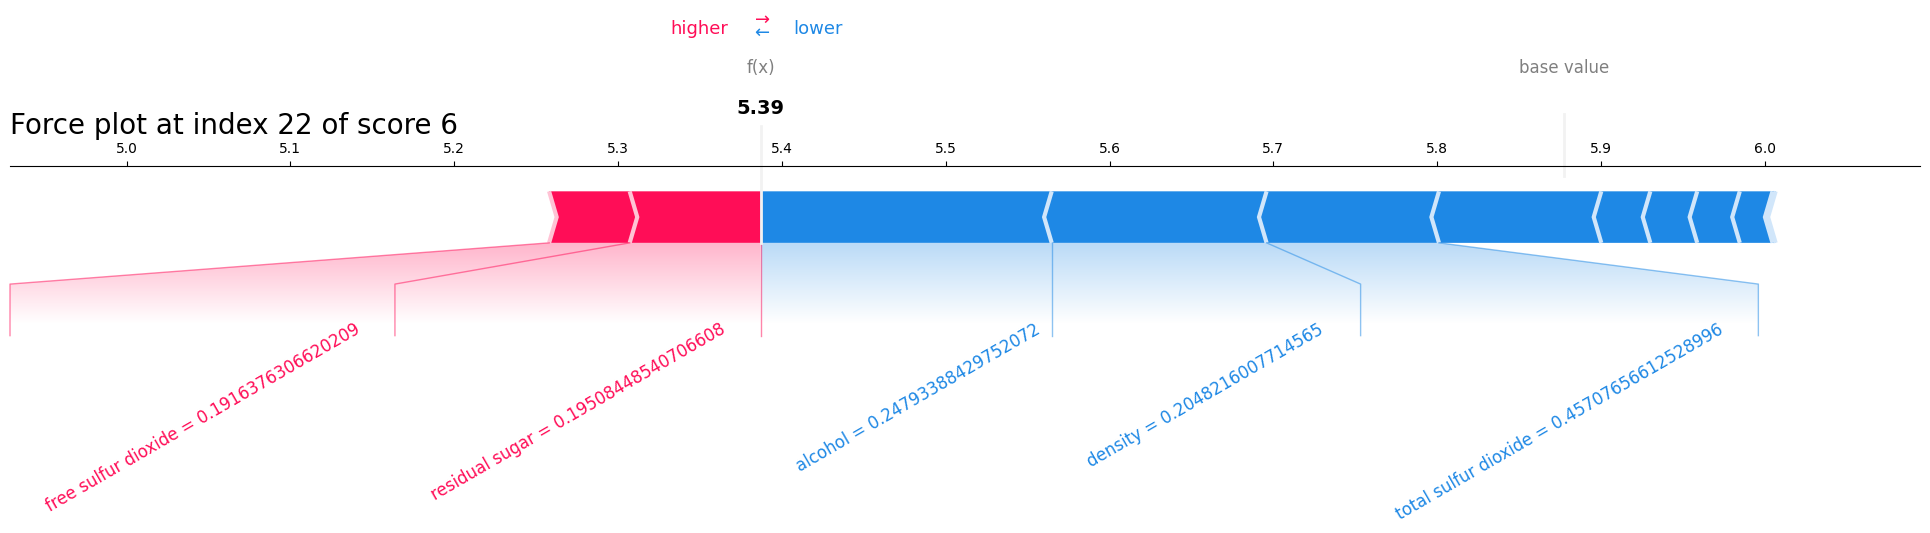

In [315]:
index = 22 # the index of the point to explain
print(test_labels[1].values[index])
shap.force_plot(explainer.expected_value, shap_values[index,:], features = test_sets[1][index,:],feature_names = feature_names,matplotlib=True, figsize=(20, 6),text_rotation=30,show=False)
plt.title('Force plot at index 22 of score 6',loc='left',fontdict={'fontsize': 20})
plt.tight_layout(pad=2)
plt.savefig('../figures/local6.png',dpi=300)
plt.show()

5


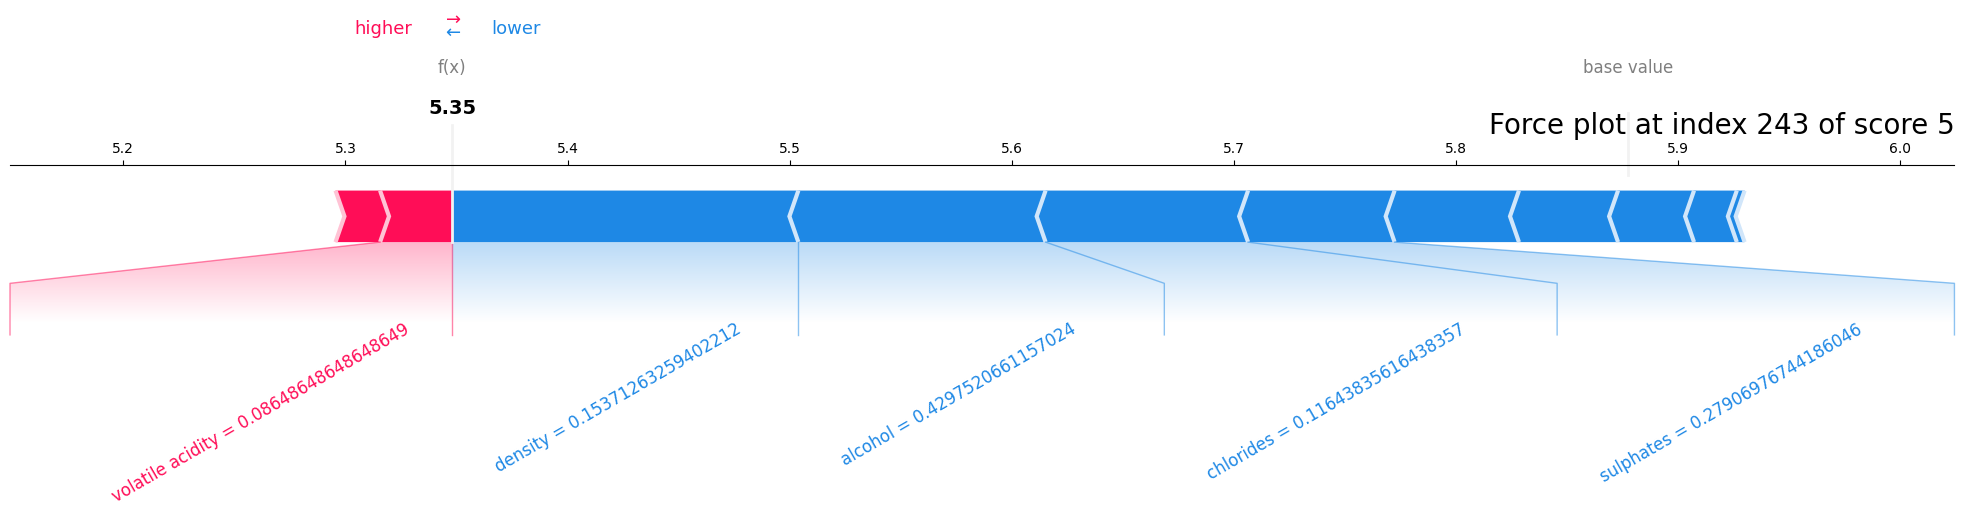

In [316]:
index = 243 # the index of the point to explain
print(test_labels[1].values[index])
shap.force_plot(explainer.expected_value, shap_values[index,:], features = test_sets[1][index,:],feature_names = feature_names,matplotlib=True, figsize=(20, 6),text_rotation=30,show=False)
plt.title('Force plot at index 243 of score 5',loc='right',fontdict={'fontsize': 20})
plt.tight_layout(pad=2)
plt.savefig('../figures/local7.png',dpi=300)
plt.show()

5


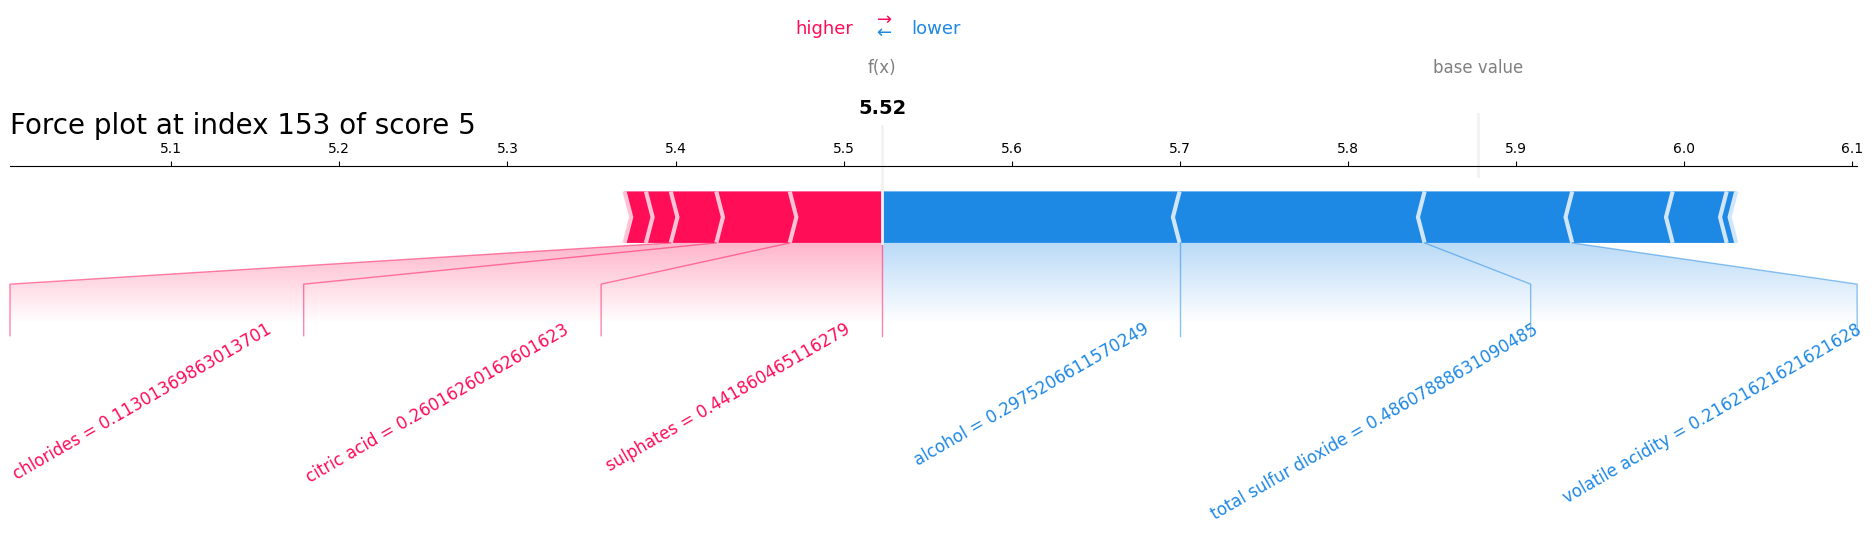

In [317]:
index = 153 # the index of the point to explain
print(test_labels[1].values[index])
shap.force_plot(explainer.expected_value, shap_values[index,:], features = test_sets[1][index,:],feature_names = feature_names,matplotlib=True, figsize=(20, 6),text_rotation=30,show=False)
plt.title('Force plot at index 153 of score 5',loc='left',fontdict={'fontsize': 20})
plt.tight_layout(pad=2)
plt.savefig('../figures/local8.png',dpi=300)
plt.show()

7


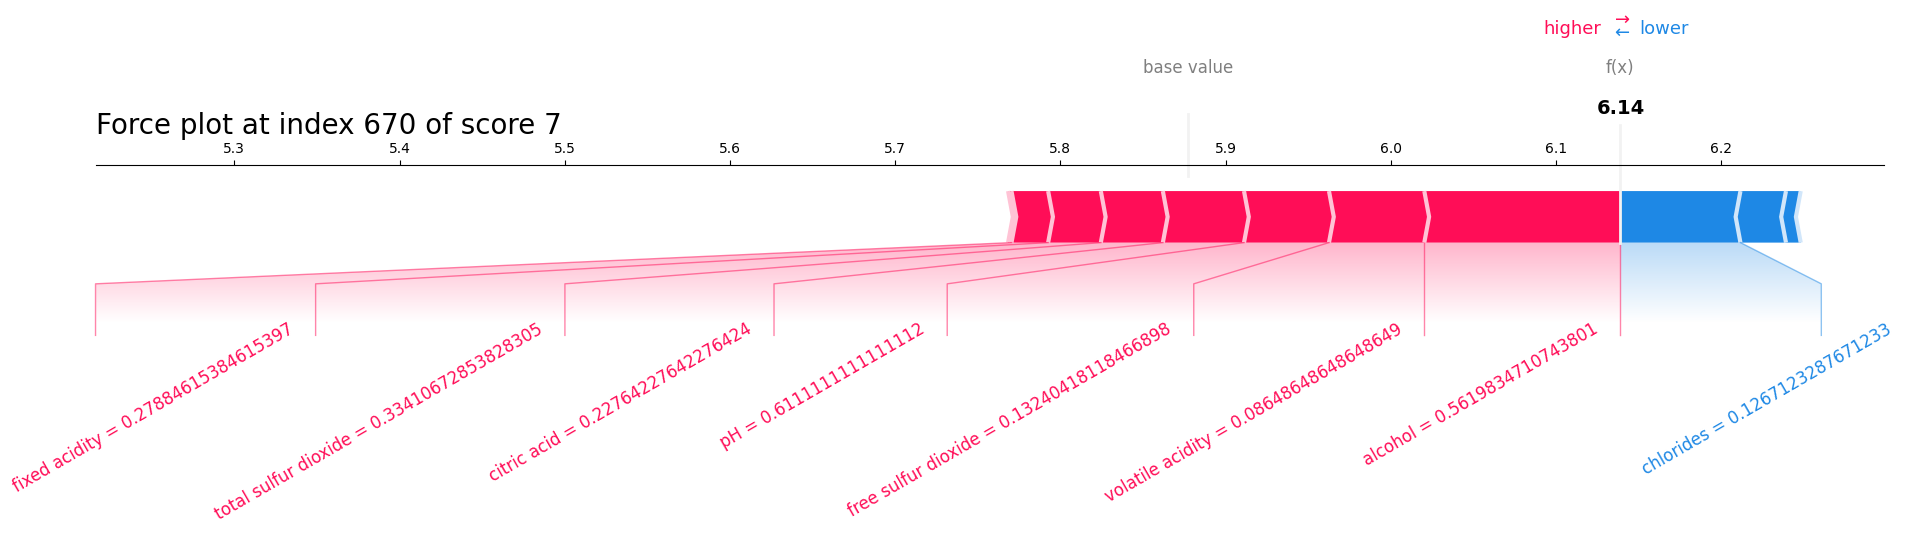

In [318]:
index = 670 # the index of the point to explain
print(test_labels[1].values[index])
shap.force_plot(explainer.expected_value, shap_values[index,:], features = test_sets[1][index,:],feature_names = feature_names,matplotlib=True, figsize=(20, 6),text_rotation=30,show=False)
plt.title('Force plot at index 670 of score 7',loc='left',fontdict={'fontsize': 20})
plt.tight_layout(pad=2)
plt.savefig('../figures/local9.png',dpi=300)
plt.show()

6


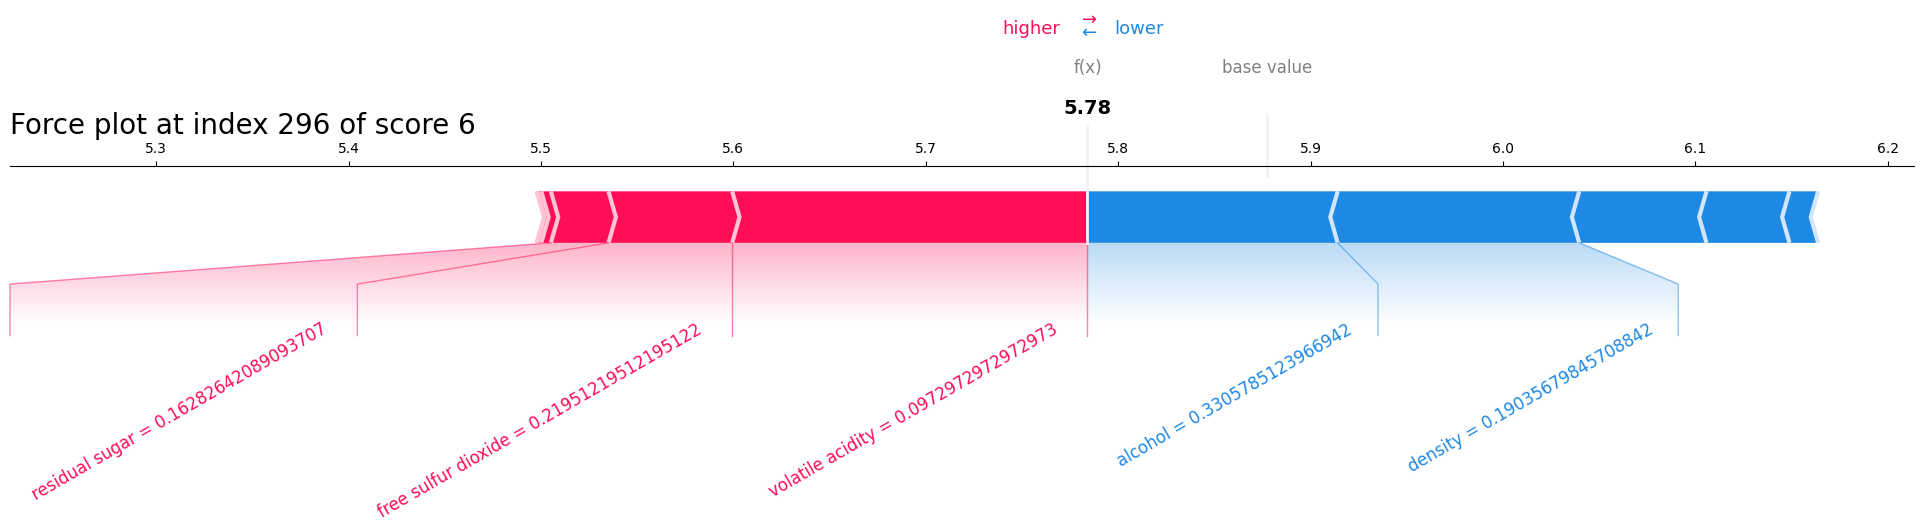

In [319]:
index = 296 # the index of the point to explain
print(test_labels[1].values[index])
shap.force_plot(explainer.expected_value, shap_values[index,:], features = test_sets[1][index,:],feature_names = feature_names,matplotlib=True, figsize=(20, 6),text_rotation=30,show=False)
plt.title('Force plot at index 296 of score 6',loc='left',fontdict={'fontsize': 20})
plt.tight_layout(pad=2)
plt.savefig('../figures/local10.png',dpi=300)
plt.show()

5


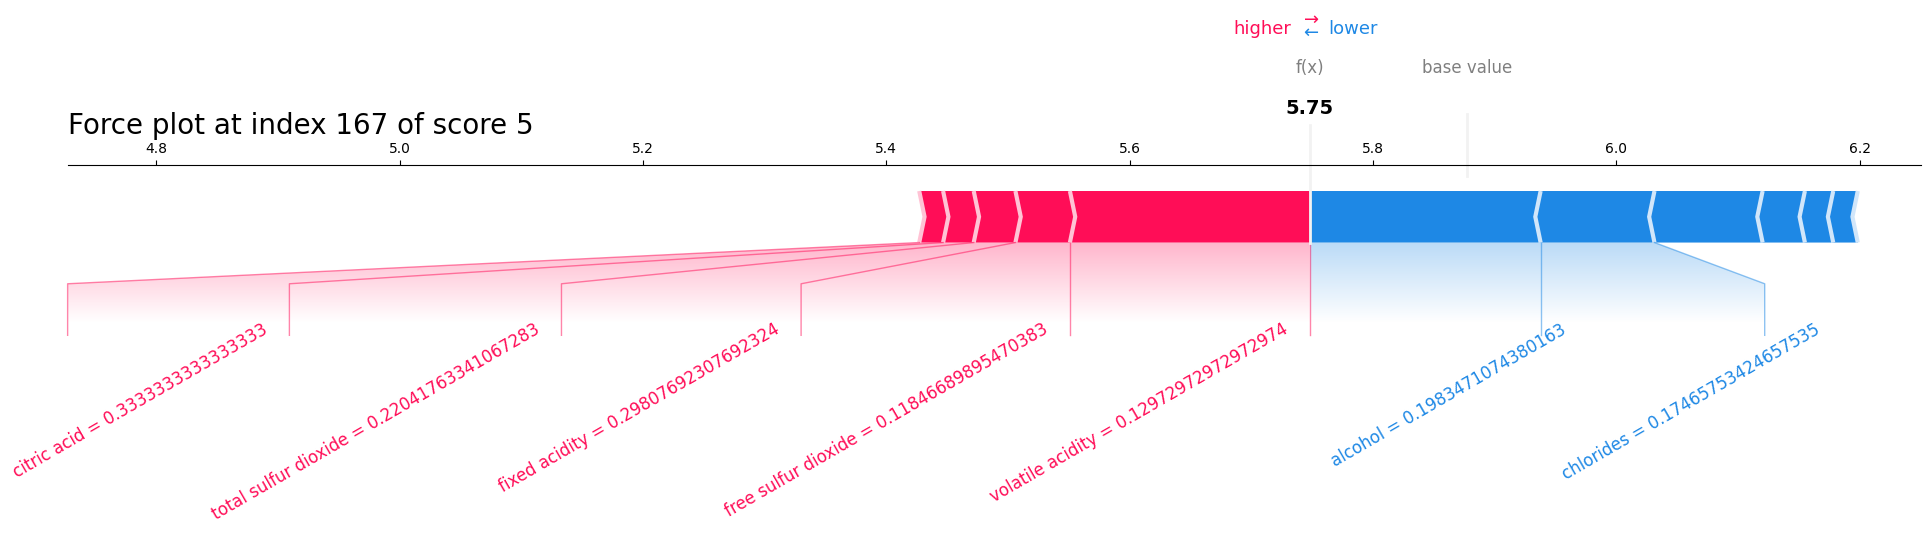

In [320]:
index = 167 # the index of the point to explain
print(test_labels[1].values[index])
shap.force_plot(explainer.expected_value, shap_values[index,:], features = test_sets[1][index,:],feature_names = feature_names,matplotlib=True, figsize=(20, 6),text_rotation=30,show=False)
plt.title('Force plot at index 167 of score 5',loc='left',fontdict={'fontsize': 20})
plt.tight_layout(pad=2)
plt.savefig('../figures/local11.png',dpi=300)
plt.show()

**Outlook**

In [135]:
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size=0.2,shuffle=True, random_state=0, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_other,y_other,test_size=0.25,shuffle=True, random_state=0, stratify=y_other)
X_train = preprocessor.fit_transform(X_train)

In [136]:
unique, counts = np.unique(y_train, return_counts=True)

In [145]:
def set_weight(x):
    global counts
    arr = counts/np.sum(counts)
    classes =[3,4,5,6,7,8,9]
    return arr[classes.index(x)]

In [146]:
set_weight = np.vectorize(set_weight)
sample_weight = np.apply_along_axis(set_weight,0,y_train)

In [139]:
from sklearn.ensemble import RandomForestRegressor
test_model = RandomForestRegressor(n_estimators=1000,max_depth=100,max_features=0.25,n_jobs=6)

In [140]:
test_model.fit(X_train,y_train,sample_weight=sample_weight)

RandomForestRegressor(max_depth=100, max_features=0.25, n_estimators=1000,
                      n_jobs=6)

In [142]:
y_pred = test_model.predict(X_val)
mean_squared_error(y_val,y_pred,squared=False)

X has feature names, but RandomForestRegressor was fitted without feature names


0.9177800529049452

In [147]:
def set_weight2(x):
    global counts
    arr = 1/(counts/np.sum(counts))
    classes =[3,4,5,6,7,8,9]
    return arr[classes.index(x)]

In [148]:
set_weight2 = np.vectorize(set_weight2)
sample_weight = np.apply_along_axis(set_weight2,0,y_train)

In [149]:
test_model.fit(X_train,y_train,sample_weight=sample_weight)

RandomForestRegressor(max_depth=100, max_features=0.25, n_estimators=1000,
                      n_jobs=6)

In [150]:
y_pred = test_model.predict(X_val)
mean_squared_error(y_val,y_pred,squared=False)

X has feature names, but RandomForestRegressor was fitted without feature names


0.8745176927300895